# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN21"
COLLABORATORS = "Szymon Marczak 405302, Dawid Makowski 407894, Tomasz Sanicki 408056"

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [8]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    #1. tab=np.zeros(grid[1]*grid[0])
    #2.dx =( x_lim[1]-x_lim[0] )/ grid[0]
    #3. dy = (y_lim[1]-y_lim[0] )/ grid[1]
    #4. for i in range([0,grid[0]]):
    #    for j in range (0,grid[1]:
    #        tab[grid[1],i,j,0] = (dx * (i+0.5) + random_component(np.random.rand()-0.5) / dx           
    #    tab[grid[1]*i+j,0] = dy *(i+0.5) + (random_component(np.random.rand()-0.5 )*dx
   # return pd.DataFrame({"X":tab[:0],"Y":tab[:1]})
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    tab = np.zeros((grid[0] * grid[1], 2)) #Tworzę tablicę dla procesu regularnego ze współrzędnymi punktów w tym procesie (incjalizacja zerami)
    
    #Ustalam odległość w danej płaszczyźnie w równomiernej siatce punktów
    dx = (x_lim[1] - x_lim[0]) / grid[0] 
    dy = (y_lim[1] - y_lim[0]) / grid[1]
    
    #Pętla przebiegająca poziomo po punktach
    for i in range(0, grid[0]):
        #Pętla przebiegająca po każdej kolumnie punktów
        for j in range(0, grid[1]):
            
            #Współrzędna punktu = połowa odległości dx/dy (dla początku) + odległość dx razy iteracja + element losowy (w zakresie +-random_component)
            tab[grid[1] * i + j, 0] = dx * (i + 0.5) + random_component * (np.random.rand() - 0.5) * dx
            tab[grid[1] * i + j, 1] = dy * (j + 0.5) + random_component * (np.random.rand() - 0.5) * dy

    return pd.DataFrame({"X":tab[:,0], "Y":tab[:,1]}) #zwracam DataFrame'a

    
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [9]:
# YOUR CODE HERE

zad5 = regular_on_rectangle([20,10], 0.5, [0,20], [0,10]) #Wywołanie funkcji

#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Proces regularny')

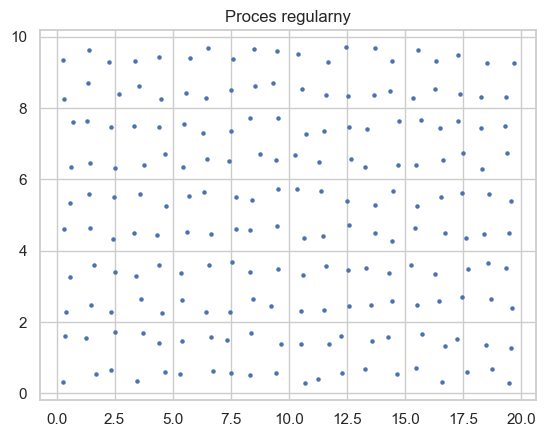

In [10]:
# YOUR CODE HERE

plt.scatter(zad5["X"], zad5["Y"], s = 5) #Wizualizacja procesu
plt.title("Proces regularny")

#raise NotImplementedError()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [14]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    x = np.random.poisson(intensity * x_lim[1] * y_lim[1]) #Generuję proces Poissona o liczbie punktów wg wzoru liczba = intensywność * pole
    tab = np.zeros((x,2)) #Tworzę tablicę zer z tą liczbą punktów
    return pd.DataFrame({"X":tab[:,0],"Y":tab[:,1]})
    #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
    for i in range(x):
        
        tab[i,0] += np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        tab[i,1] += np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        
    return pd.DataFrame({"X":tab[:,0], "Y":tab[:,1]}) #Zwracam DataFrame'a
    #return pd.DataFrame({"X":tab[:,0],"Y":tab[:,1]})

    # raise NotImplementedError()

#### b) Wygenerowanie procesu

In [15]:
# YOUR CODE HERE

zad2 = homogeneous_poisson_on_rectangle(10, [0,20], [0,10])

# raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Proces jednorodny Poissona')

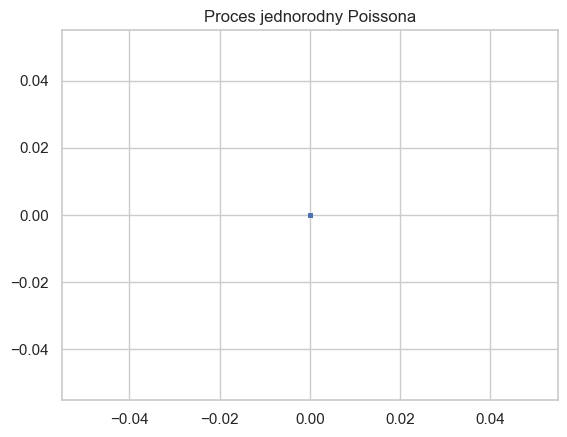

In [16]:
# YOUR CODE HERE

plt.scatter(zad2["X"], zad2["Y"], s = 5)
plt.title("Proces jednorodny Poissona")

# raise NotImplementedError()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [17]:
def intensity_function (x,y):
    z = x + y
    return z

def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    #Tworzę dwie tablice przechowujące 100 liczb między skrajnymi wartościami wspołrzędnych razem tworzących siatkę 100x100
    #(potrzebne będzie do określenia maksymalnej wartości intensywności funkcji), poniżej tworzę tablicę stu liczb
    x1 = np.array(list(np.linspace(x_lim[0], x_lim[1], 100)))
    y1 = np.array(list(np.linspace(y_lim[0], y_lim[1], 100)))
    
    #Obliczam intensywność funkcji, intensity_function zwraca tablicę wartości tej funkcji i wyłaniamy największą wartość
    intensywnosc = max(intensity_function(x1, y1))
    
    points = pd.DataFrame(columns  = ["X", "Y"]) #Tworzę DataFrame'a, który będziesz zawierał informacje o współrzędnych punktów
    ile = np.random.poisson(intensywnosc*x_lim[1]*y_lim[1]) #Obliczam ile może być punktów losowych funkcją np.random.poisson()
    
    #Pętla po każdym punkcie losowym
    for i in range(ile):
        
        #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]        
        
        #Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym 1 - i / max(i)
        #gdzie:
        #i to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu,
        #max(i) to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru
        if 1 - intensity_function(x,y) / intensywnosc <= np.random.rand(): #Realizacja powyższego warunku
            
            #Tylko pasujące punkty są dodawane do DataFrame'a
            #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
            points.loc[len(points.index)] = [x,y]

    return points #Zwracam DataFrame'a z punktami

    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [18]:
# YOUR CODE HERE

zad3 = unhomogeneous_poisson_on_rectangle(intensity_function, [0,20], [0,10])

# raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Niejednorodny proces Poissona')

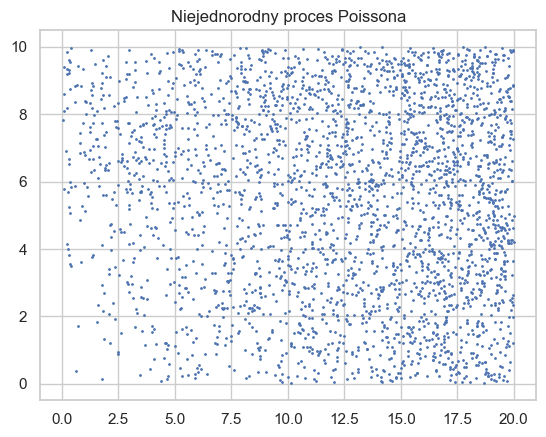

In [19]:
# YOUR CODE HERE

plt.scatter(zad3["X"], zad3["Y"], s = 1)
plt.title("Niejednorodny proces Poissona")

#raise NotImplementedError()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [20]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    df=pd.DataFrame(columns =["X',"Y"])
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    #PROCES RODZICIELSKI
    ile = np.random.poisson(parent_intensity * x_lim[1] * y_lim[1]) #Obliczam ile może być punktów losowych rozkładu rodzicielskiego
    df_parent =  pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu rodzicielskiego
    
    #Współrzędne punktów procesu rodzicielskiego
    for i in range(ile):
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        df_parent.loc[len(df_parent.index)] = [x,y]
    
    #PROCES POTOMNY
    points = pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu potomnego
    liczba_punktow_procesu = int(daughter_intensity*np.pi*cluster_radius**2) #liczba punktów procesu potomnego dla pętli for liczba = intensywnosc * pole
    
    #Pętla przebiegająca po każdym skupieniu
    for i in range(ile): 
         #Pętla przebiegająca po każdym punkcie w danym skupieniu
        for j in range(liczba_punktow_procesu):
            
            #Generuję punkt w procesie równomiernego rozłożenia w kole
            angle = np.random.rand() * 2 * np.pi #losowy kąt
            radius = cluster_radius * np.sqrt(np.random.rand()) #losowy promień
            
            #Współrzędne punktu w kole względem jego środka
            x_wsp_rand = np.cos(angle) * radius
            y_wsp_rand = np.sin(angle) * radius
            
            #Dodaję współrzędne środka koła (skupienia) do współrzędnych punktu, żeby przypisać go do danego skupienia
            x = x_wsp_rand + df_parent["X"][i]
            y = y_wsp_rand + df_parent["Y"][i]
            
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if x <= x_lim[1] and y <= y_lim[1] and x >= x_lim[0] and y >= y_lim[0]:
                
                #Tylko punkty znajdujące się w prostokącie zostają dopisane do DataFrame'a
                #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
                points.loc[len(points.index)] = [x,y]
                
    return points #Zwracam DataFrame'a

# raise NotImplementedError()

#### b) Wygenerowanie procesu

In [21]:
# YOUR CODE HERE
zad4 = materna_on_rectangle(0.1, 10, 1, [0,15], [0,10])

# raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'klastrowy o rozkładzie jednorodnym')

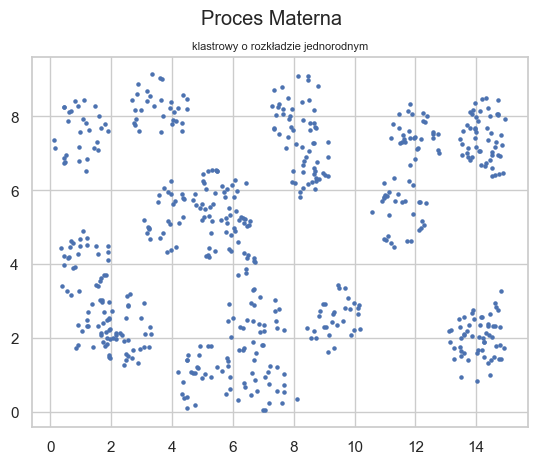

In [22]:
# YOUR CODE HERE

plt.scatter(zad4["X"], zad4["Y"], s = 5) #wizualizacja procesu potomnego
plt.suptitle("Proces Materna")
plt.title("klastrowy o rozkładzie jednorodnym", fontsize = 8)

#raise NotImplementedError()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [171]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    
    # YOUR CODE HERE
    
    #PROCES RODZICIELSKI
    ile = np.random.poisson(parent_intensity * x_lim[1] * y_lim[1]) #Obliczam ile może być punktów losowych rozkładu rodzicielskiego
    df_parent =  pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu rodzicielskiego
    
    #Współrzędne punktów procesu rodzicielskiego
    for i in range(ile):
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        df_parent.loc[len(df_parent.index)] = [x,y]
    
    #Tablica z liczbą punktów w każdym skupieniu
    cluster_sizes = np.zeros((ile,), dtype=int) #Inicjacja tablicy
    cluster_sizes[:] = [int(np.random.poisson(mean_cluster_size)) for i in range(ile)] #Przypisanie losowych liczb na podstawie oczekiwanej liczebności generowanych klastrów
    
    #PROCES POTOMNY
    points = pd.DataFrame(columns = ["X", "Y"]) #DataFrame na punkty procesu potomnego
    
    #Pętla przebiegająca po każdym skupieniu
    for i in range(ile):
        #Pętla przebiegająca po każdym punkcie w danym skupieniu (ilość punktów w skupieniu - cluster_sizes[i])
        for j in range(cluster_sizes[i]):
            
            #Generuję losową zmienną dla współrzędnych z rozkładu losowego
            x_wsp_rand = np.random.normal(0, cluster_sigma)
            y_wsp_rand = np.random.normal(0, cluster_sigma)
            
            #Dodaję współrzędne środka koła (skupienia) do współrzędnych punktu, żeby przypisać go do danego skupienia
            x = x_wsp_rand + df_parent["X"][i]
            y = y_wsp_rand + df_parent["Y"][i]
            
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if x <= x_lim[1] and y <= y_lim[1] and x >= x_lim[0] and y >= y_lim[0]:
                
                #Tylko punkty znajdujące się w prostokącie zostają dopisane do DataFrame'a
                #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
                points.loc[len(points.index)] = [x,y]
   

    return points #Zwracam DataFrame'a
    
   # raise NotImplementedError()

#### b) Wygenerowanie procesu

In [173]:
# YOUR CODE HERE

zad5 = thomas_on_rectangle(0.2, 30, 0.5, [0,20], [0,10])

# raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'klastrowy o rozkładzie normalnym    ')

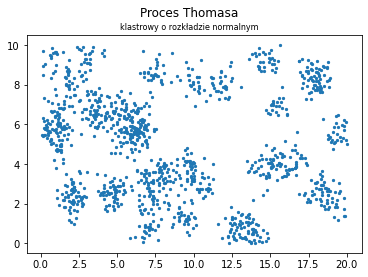

In [185]:
# YOUR CODE HERE

plt.scatter(zad5["X"], zad5["Y"], s = 5) #wizualizacja procesu potomnego
plt.suptitle("Proces Thomasa")
plt.title("klastrowy o rozkładzie normalnym    ", fontsize = 8)

# raise NotImplementedError()